# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

!pip install citipy

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
print("Everything is good to go!")

Everything is good to go!


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
city_count = len(cities)
print(city_count)
print(cities)

627
['carnarvon', 'tuktoyaktuk', 'cape town', 'elat', 'achutupo', 'ahipara', 'lodwar', 'ushuaia', 'gwanda', 'norman wells', 'groningen', 'puerto ayora', 'kodiak', 'rikitea', 'chokurdakh', 'luderitz', 'ponta do sol', 'college', 'cap malheureux', 'iqaluit', 'saskylakh', 'mitsamiouli', 'mandera', 'yellowknife', 'barrow', 'mataura', 'albany', 'victoria', 'khatanga', 'tucuma', 'nikolskoye', 'ponta delgada', 'san miguel', 'punta arenas', 'vytegra', 'westport', 'severo-kurilsk', 'swift current', 'ancud', 'nanortalik', 'sabha', 'byron bay', 'gisors', 'bilibino', 'hermanus', 'qingyuan', 'east london', 'kuito', 'jamestown', 'pangody', 'sisimiut', 'valle de angeles', 'gizo', 'cidreira', 'navrongo', 'qaanaaq', 'belushya guba', 'port alfred', 'torbay', 'vila franca do campo', 'jalu', 'castro', 'tambul', 'pimenta bueno', 'kautokeino', 'kapaa', 'masuguru', 'yulara', 'shagonar', 'amderma', 'pevek', 'hamilton', 'quelimane', 'ouadda', 'sena madureira', 'illoqqortoormiut', 'bengkulu', 'taolanaro', 'kaeo'

# Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
import json
#Create a URL
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "Austin"

#Make the query
query_url = url + "appid=" +  weather_api_key + "&q=" + city

#Make the .json
city_json = requests.get(query_url).json()

#Print .json
print(json.dumps(city_json, indent=4, sort_keys = True))

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 30.27,
        "lon": -97.74
    },
    "dt": 1592768173,
    "id": 4671654,
    "main": {
        "feels_like": 308.98,
        "humidity": 55,
        "pressure": 1014,
        "temp": 305.62,
        "temp_max": 306.48,
        "temp_min": 304.82
    },
    "name": "Austin",
    "sys": {
        "country": "US",
        "id": 3344,
        "sunrise": 1592738992,
        "sunset": 1592789749,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 16093,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 0,
        "speed": 2.1
    }
}


In [4]:
#Let's do that for each city now

#Create list
date = []
name = []
country = []
lat = []
long = []
humidity = []
pressure = []
max_temp = []
min_temp = []
clouds = []
wind_speed = []

#City loop
for index, city in enumerate(cities):
    #Piece together URL
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    #turn into .json
    city_json = requests.get(query_url).json()
    #try and except to seperate errors
    try:
        name.append(city_json["name"])
        date.append(city_json["dt"])
        country.append(city_json["sys"]["country"])
        lat.append(city_json["coord"]["lat"])
        long.append(city_json["coord"]["lon"])
        humidity.append(city_json["main"]["humidity"])
        pressure.append(city_json["main"]["pressure"])
        max_temp.append(city_json["main"]["temp_max"])
        min_temp.append(city_json["main"]["temp_min"])
        clouds.append(city_json["clouds"]["all"])
        wind_speed.append(city_json["wind"]["speed"])
        print("Index: {}, City: {} was found! Success!" .format(index, city))
    except:
        print("Index: {}, City: {} wasn't found. Tough luck..")

Index: 0, City: carnarvon was found! Success!
Index: 1, City: tuktoyaktuk was found! Success!
Index: 2, City: cape town was found! Success!
Index: 3, City: elat was found! Success!
Index: 4, City: achutupo was found! Success!
Index: 5, City: ahipara was found! Success!
Index: 6, City: lodwar was found! Success!
Index: 7, City: ushuaia was found! Success!
Index: 8, City: gwanda was found! Success!
Index: 9, City: norman wells was found! Success!
Index: 10, City: groningen was found! Success!
Index: 11, City: puerto ayora was found! Success!
Index: 12, City: kodiak was found! Success!
Index: 13, City: rikitea was found! Success!
Index: 14, City: chokurdakh was found! Success!
Index: 15, City: luderitz was found! Success!
Index: 16, City: ponta do sol was found! Success!
Index: 17, City: college was found! Success!
Index: 18, City: cap malheureux was found! Success!
Index: 19, City: iqaluit was found! Success!
Index: 20, City: saskylakh was found! Success!
Index: 21, City: mitsamiouli was

Index: 177, City: bluff was found! Success!
Index: 178, City: ler was found! Success!
Index: 179, City: katsuura was found! Success!
Index: 180, City: hokitika was found! Success!
Index: 181, City: columbus was found! Success!
Index: 182, City: mascote was found! Success!
Index: 183, City: teknaf was found! Success!
Index: {}, City: {} wasn't found. Tough luck..
Index: 185, City: lompoc was found! Success!
Index: {}, City: {} wasn't found. Tough luck..
Index: 187, City: ketchikan was found! Success!
Index: 188, City: itoman was found! Success!
Index: 189, City: vaini was found! Success!
Index: 190, City: wattegama was found! Success!
Index: 191, City: chumikan was found! Success!
Index: 192, City: taoudenni was found! Success!
Index: 193, City: aksu was found! Success!
Index: 194, City: alexandria was found! Success!
Index: 195, City: fortuna was found! Success!
Index: 196, City: mount isa was found! Success!
Index: 197, City: paragominas was found! Success!
Index: 198, City: san patri

Index: 353, City: fukuma was found! Success!
Index: 354, City: filingue was found! Success!
Index: 355, City: acoua was found! Success!
Index: 356, City: carolina was found! Success!
Index: 357, City: benghazi was found! Success!
Index: 358, City: anadyr was found! Success!
Index: 359, City: lazaro cardenas was found! Success!
Index: {}, City: {} wasn't found. Tough luck..
Index: 361, City: kalangala was found! Success!
Index: 362, City: kargasok was found! Success!
Index: 363, City: camocim was found! Success!
Index: 364, City: beloha was found! Success!
Index: 365, City: ambon was found! Success!
Index: 366, City: cherskiy was found! Success!
Index: 367, City: gat was found! Success!
Index: {}, City: {} wasn't found. Tough luck..
Index: 369, City: tilichiki was found! Success!
Index: 370, City: amapa was found! Success!
Index: 371, City: muros was found! Success!
Index: 372, City: lar was found! Success!
Index: {}, City: {} wasn't found. Tough luck..
Index: 374, City: cayenne was fou

Index: 527, City: zakamensk was found! Success!
Index: {}, City: {} wasn't found. Tough luck..
Index: 529, City: naze was found! Success!
Index: 530, City: nemuro was found! Success!
Index: 531, City: capitao poco was found! Success!
Index: 532, City: cerro de pasco was found! Success!
Index: 533, City: el rosario was found! Success!
Index: 534, City: nenjiang was found! Success!
Index: 535, City: bela vista de goias was found! Success!
Index: 536, City: shush was found! Success!
Index: 537, City: wajir was found! Success!
Index: 538, City: pyinmana was found! Success!
Index: 539, City: biak was found! Success!
Index: 540, City: sabzevar was found! Success!
Index: 541, City: rongcheng was found! Success!
Index: {}, City: {} wasn't found. Tough luck..
Index: 543, City: general bravo was found! Success!
Index: 544, City: dongsheng was found! Success!
Index: 545, City: bilma was found! Success!
Index: 546, City: lima was found! Success!
Index: {}, City: {} wasn't found. Tough luck..
Index

# #Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Weather Data Frame
weather_df = pd.DataFrame({
    "City": name,
    "Date": date, 
    "Country": country,
    "Latitude": lat,
    "Longitude": long,
    "Humidity": humidity,
    "Pressure": pressure,
    "Max_Temp": max_temp,
    "Min_Temp": min_temp,
    "Cloudiness": clouds,
    "Wind Speed": wind_speed,
})
#Display Weather Data Frame
weather_df.head(10)

,City,Date,Country,Latitude,Longitude,Humidity,Pressure,Max_Temp,Min_Temp,Cloudiness,Wind Speed
0,Carnarvon,1592768314,AU,-24.87,113.63,82,1014,288.15,288.15,0,2.60
1,Tuktoyaktuk,1592768027,CA,69.45,-133.04,86,1011,278.15,278.15,90,2.10
2,Cape Town,1592768314,ZA,-33.93,18.42,93,1023,288.71,286.48,75,2.60
3,Eilat,1592768314,IL,29.56,34.95,19,1007,308.15,308.15,0,0.80
4,Achutupo,1592768314,PA,9.20,-77.98,69,1008,302.62,302.62,100,2.42
5,Ahipara,1592768032,NZ,-35.17,173.17,83,1017,286.26,286.26,8,4.39
6,Lodwar,1592768314,KE,3.12,35.60,45,1011,302.98,302.98,32,2.03
7,Ushuaia,1592768104,AR,-54.80,-68.30,88,996,277.15,277.15,40,2.10
8,Gwanda,1592768315,ZW,-20.93,29.00,42,1022,284.87,284.87,0,0.68
9,Norman Wells,1592768016,CA,65.28,-126.83,100,1004,285.15,285.15,90,4.60


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

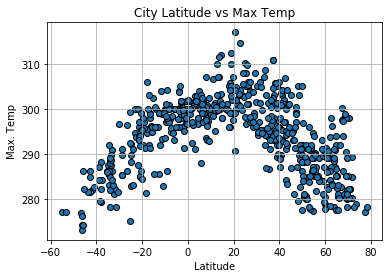

In [6]:
#Scatterplot config
plt.scatter(weather_df["Latitude"], weather_df["Max_Temp"], marker="o", edgecolors = {"black"})
plt.title("City Latitude vs Max Temp")
plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
plt.grid(True)

#Save Scatterplot as image
plt.savefig("Latitude_MaxTemp.png")

#Display Scatterplot
plt.show()

#### Latitude vs. Humidity Plot

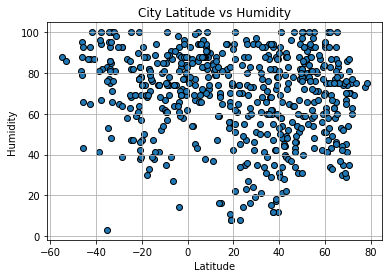

In [7]:
#Scatterplot config
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker='o', edgecolors = {"black"})
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

#Save Scatterplot as image
plt.savefig("Latitude_Humidity.png")

#Display Scatterplot
plt.show()

#### Latitude vs. Cloudiness Plot

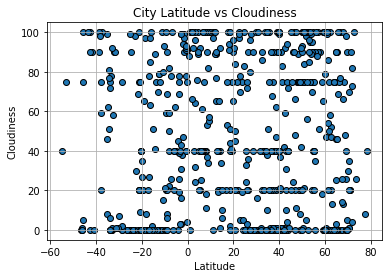

In [8]:
#Scatterplot config
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker='o', edgecolors = {"black"})
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

#Save Scatterplot as image
plt.savefig("Latitude_Cloudiness.png")

#Display Scatterplot
plt.show()

#### Latitude vs. Wind Speed Plot

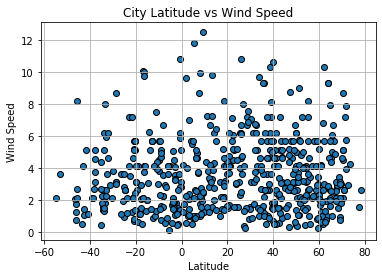

In [9]:
#Scatterplot config
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker='o', edgecolors = {"black"})
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

#Save Scatterplot as image
plt.savefig("Latitude_WindSpeed.png")

#Display Scatterplot
plt.show()

## Linear Regression

In [10]:
# Create Northern Hemisphere DataFrame
north_df = weather_df.loc[weather_df["Latitude"]>0]

#Display DataFrame
north_df.head()

,City,Date,Country,Latitude,Longitude,Humidity,Pressure,Max_Temp,Min_Temp,Cloudiness,Wind Speed
1,Tuktoyaktuk,1592768027,CA,69.45,-133.04,86,1011,278.15,278.15,90,2.10
3,Eilat,1592768314,IL,29.56,34.95,19,1007,308.15,308.15,0,0.80
4,Achutupo,1592768314,PA,9.20,-77.98,69,1008,302.62,302.62,100,2.42
6,Lodwar,1592768314,KE,3.12,35.60,45,1011,302.98,302.98,32,2.03
9,Norman Wells,1592768016,CA,65.28,-126.83,100,1004,285.15,285.15,90,4.60


In [11]:
# Create South Hemisphere DataFrame
south_df = weather_df.loc[weather_df["Latitude"]<0]

#Display DataFrame
south_df.head()

,City,Date,Country,Latitude,Longitude,Humidity,Pressure,Max_Temp,Min_Temp,Cloudiness,Wind Speed
0,Carnarvon,1592768314,AU,-24.87,113.63,82,1014,288.15,288.15,0,2.60
2,Cape Town,1592768314,ZA,-33.93,18.42,93,1023,288.71,286.48,75,2.60
5,Ahipara,1592768032,NZ,-35.17,173.17,83,1017,286.26,286.26,8,4.39
7,Ushuaia,1592768104,AR,-54.80,-68.30,88,996,277.15,277.15,40,2.10
8,Gwanda,1592768315,ZW,-20.93,29.00,42,1022,284.87,284.87,0,0.68


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R-Sq. = -0.6951604928593036


<function matplotlib.pyplot.show(*args, **kw)>

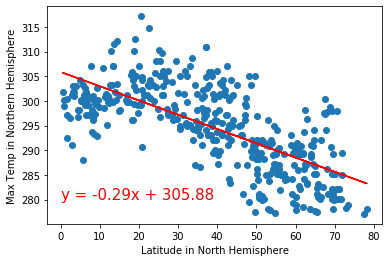

In [21]:
#Define x and y values
x_values = north_df["Latitude"]
y_values = north_df["Max_Temp"]

#Configure SciPy
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Plot formulas
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Configure Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Configure Plot Cosmetics
plt.xlabel("Latitude in North Hemisphere")
plt.ylabel("Max Temp in Northern Hemisphere")
plt.annotate(line_eq,(0,280),fontsize = 15,color = "red")

#Print R Value
print("R-Sq. = {}".format(rvalue))

#Show plot
plt.show

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R-Sq. = 0.8025772047000381


<function matplotlib.pyplot.show(*args, **kw)>

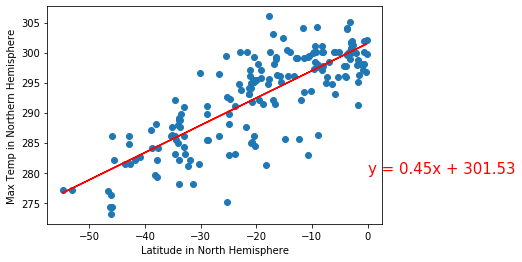

In [27]:
#Define x and y values
x_values = south_df["Latitude"]
y_values = south_df["Max_Temp"]

#Configure SciPy
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Plot formulas
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Configure Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Configure Plot Cosmetics
plt.xlabel("Latitude in North Hemisphere")
plt.ylabel("Max Temp in Northern Hemisphere")
plt.annotate(line_eq,(0,280),fontsize = 15,color = "red")

#Print R Value, then display Chart
print("R-Sq. = {}".format(rvalue))

#Display Chart
plt.show

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-Sq. = -0.05485986926748867


<function matplotlib.pyplot.show(*args, **kw)>

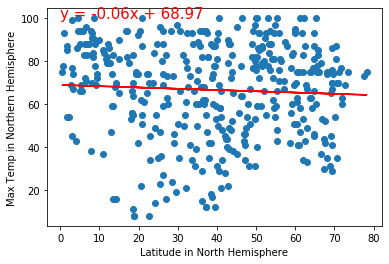

In [30]:
#Define x and y values
x_values = north_df["Latitude"]
y_values = north_df["Humidity"]

#Configure SciPy
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Plot formulas
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Configure Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Configure Plot Cosmetics
plt.xlabel("Latitude in North Hemisphere")
plt.ylabel("Max Temp in Northern Hemisphere")
plt.annotate(line_eq,(0,100),fontsize = 15,color = "red")

#Print R Value, then display Chart
print("R-Sq. = {}".format(rvalue))

#Display Chart
plt.show

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-Sq. = -0.13028814982360493


<function matplotlib.pyplot.show(*args, **kw)>

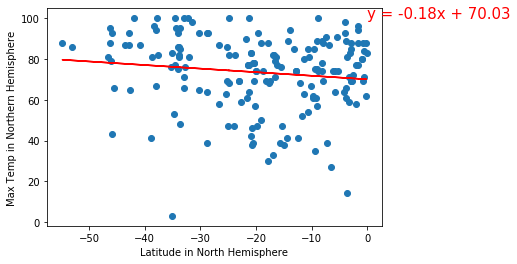

In [29]:
#Define x and y values
x_values = south_df["Latitude"]
y_values = south_df["Humidity"]

#Configure SciPy
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Plot formulas
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Configure Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Configure Plot Cosmetics
plt.xlabel("Latitude in North Hemisphere")
plt.ylabel("Max Temp in Northern Hemisphere")
plt.annotate(line_eq,(0,100),fontsize = 15,color = "red")

#Print R Value, then display Chart
print("R-Sq. = {}".format(rvalue))

#Display Chart
plt.show

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-Sq. = -0.07937323700408355


<function matplotlib.pyplot.show(*args, **kw)>

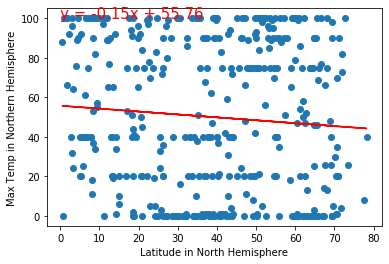

In [31]:
#Define x and y values
x_values = north_df["Latitude"]
y_values = north_df["Cloudiness"]

#Configure SciPy
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Plot formulas
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Configure Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Configure Plot Cosmetics
plt.xlabel("Latitude in North Hemisphere")
plt.ylabel("Max Temp in Northern Hemisphere")
plt.annotate(line_eq,(0,100),fontsize = 15,color = "red")

#Print R Value, then display Chart
print("R-Sq. = {}".format(rvalue))

#Display Chart
plt.show

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-Sq. = 0.07960916110607977


<function matplotlib.pyplot.show(*args, **kw)>

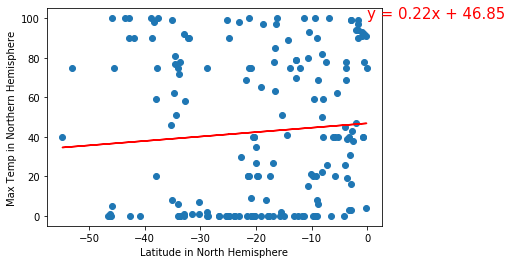

In [32]:
#Define x and y values
x_values = south_df["Latitude"]
y_values = south_df["Cloudiness"]

#Configure SciPy
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Plot formulas
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Configure Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Configure Plot Cosmetics
plt.xlabel("Latitude in North Hemisphere")
plt.ylabel("Max Temp in Northern Hemisphere")
plt.annotate(line_eq,(0,100),fontsize = 15,color = "red")

#Print R Value, then display Chart
print("R-Sq. = {}".format(rvalue))

#Display Chart
plt.show

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-Sq. = -0.05781380997386522


<function matplotlib.pyplot.show(*args, **kw)>

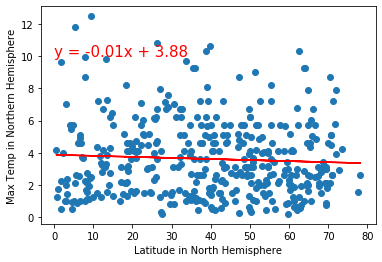

In [41]:
#Define x and y values
x_values = north_df["Latitude"]
y_values = north_df["Wind Speed"]

#Configure SciPy
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Plot formulas
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Configure Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Configure Plot Cosmetics
plt.xlabel("Latitude in North Hemisphere")
plt.ylabel("Max Temp in Northern Hemisphere")
plt.annotate(line_eq,(0,10),fontsize = 15,color = "red")

#Print R Value, then display Chart
print("R-Sq. = {}".format(rvalue))

#Display Chart
plt.show

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-Sq. = 0.03690983213242813


<function matplotlib.pyplot.show(*args, **kw)>

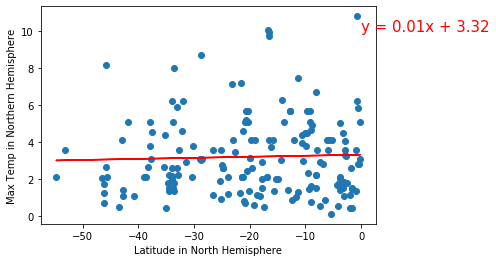

In [40]:
#Define x and y values
x_values = south_df["Latitude"]
y_values = south_df["Wind Speed"]

#Configure SciPy
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Plot formulas
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Configure Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Configure Plot Cosmetics
plt.xlabel("Latitude in North Hemisphere")
plt.ylabel("Max Temp in Northern Hemisphere")
plt.annotate(line_eq,(0,10),fontsize = 15,color = "red")

#Print R Value, then display Chart
print("R-Sq. = {}".format(rvalue))

#Display Chart
plt.show